In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
 import yfinance as yf

In [3]:
from datetime import datetime 
end = datetime.now()
start = datetime(end.year-20,end.month,end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2005-01-18,5.060283,5.078465,5.106360,4.947954,5.005488,528878966
2005-01-19,4.896488,4.914081,5.113334,4.899386,5.097145,451995865
2005-01-20,4.812604,4.829896,4.887929,4.782076,4.794529,361413608
2005-01-21,4.672634,4.689423,4.865762,4.685438,4.845338,371724110
2005-01-24,4.485014,4.501129,4.715575,4.491166,4.699635,563010421


In [6]:
google_data.shape

(5032, 6)

In [7]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,48.904267,49.068837,49.565597,48.557108,49.047150,1.083182e+08
std,46.826216,46.963908,47.454908,46.468973,46.931806,1.416824e+08
min,4.342810,4.358414,4.443345,4.298140,4.366135,1.584340e+05
25%,13.341438,13.389375,13.539501,13.238441,13.404258,2.649648e+07
50%,28.134460,28.235550,28.531916,27.980928,28.305038,5.007100e+07
75%,65.035946,65.269627,65.657125,64.784000,65.095247,1.318142e+08
max,198.160004,198.160004,202.880005,196.690002,198.529999,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2005-01-18 to 2025-01-15
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5032 non-null   float64
 1   (Close, GOOG)      5032 non-null   float64
 2   (High, GOOG)       5032 non-null   float64
 3   (Low, GOOG)        5032 non-null   float64
 4   (Open, GOOG)       5032 non-null   float64
 5   (Volume, GOOG)     5032 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [9]:
google_data.isna().sum()

Price      Ticker
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

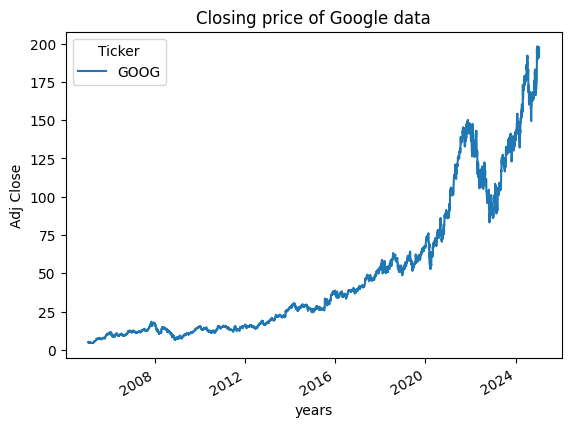

In [11]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")


In [12]:
def plot_graph(figsize, values, column_name ):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [13]:
google_data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

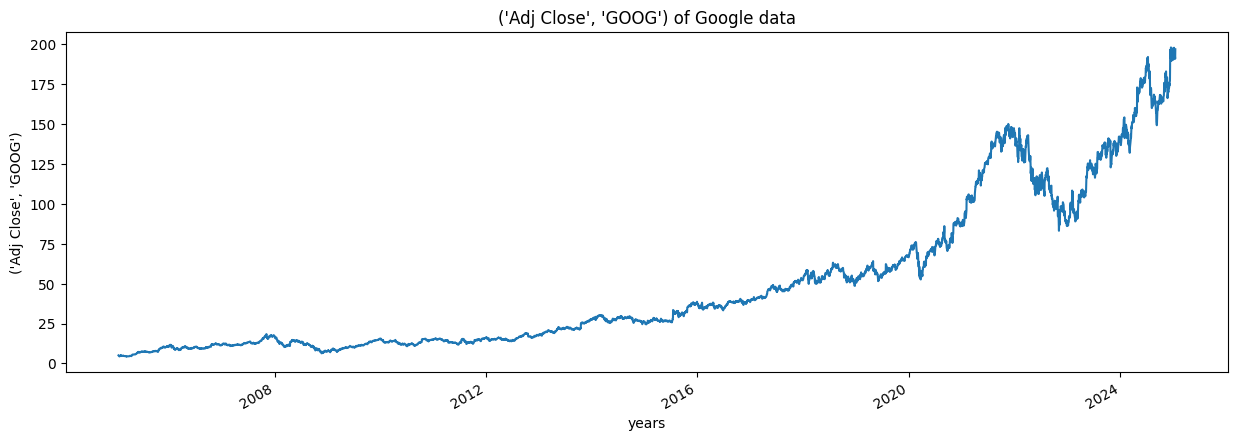

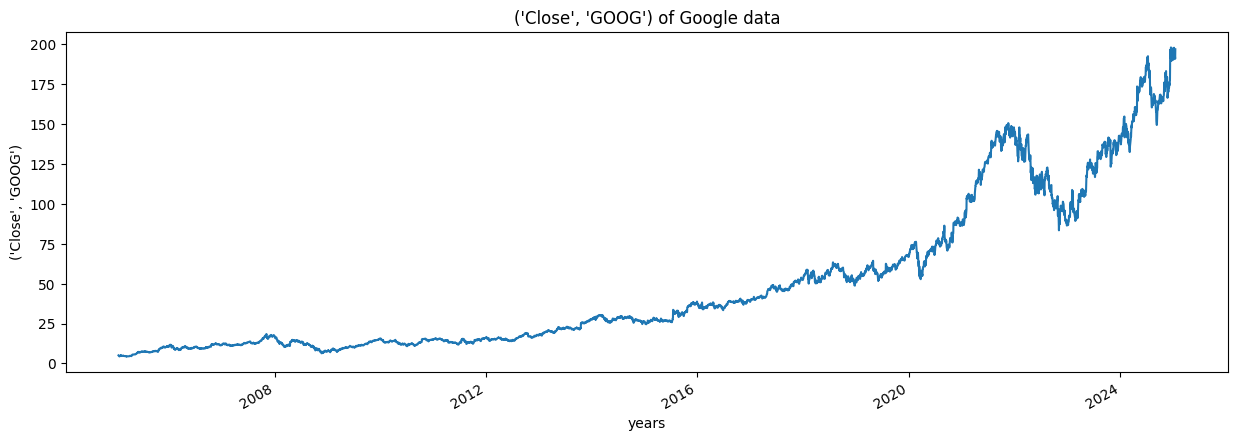

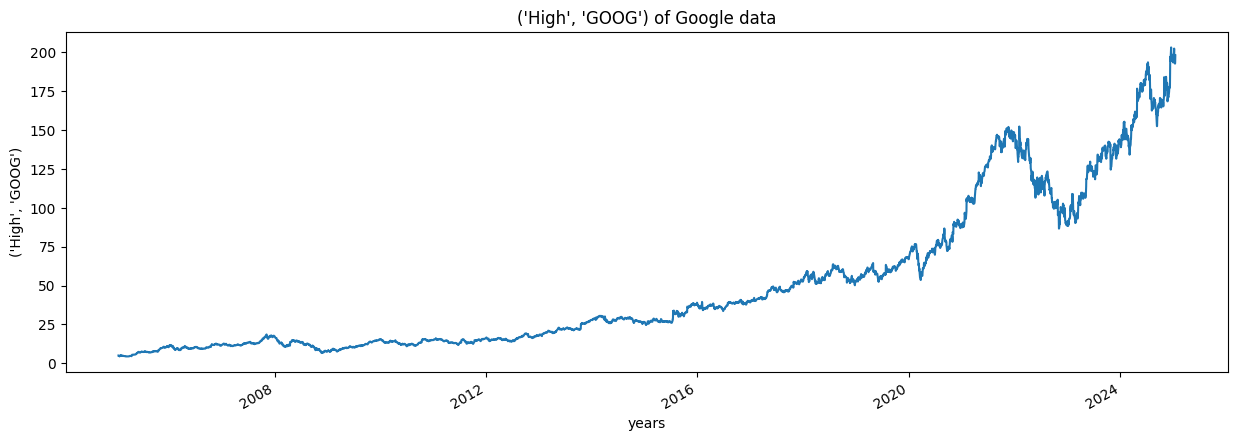

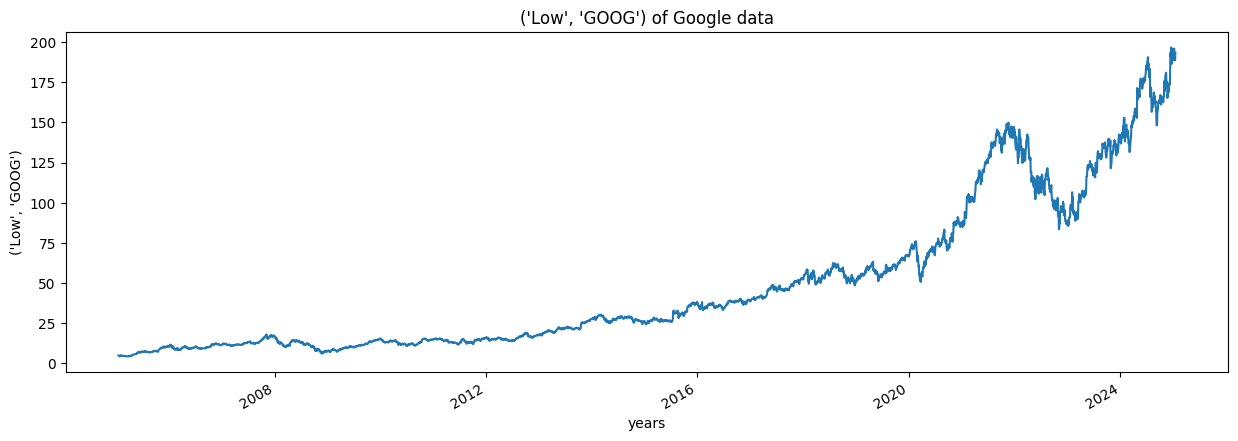

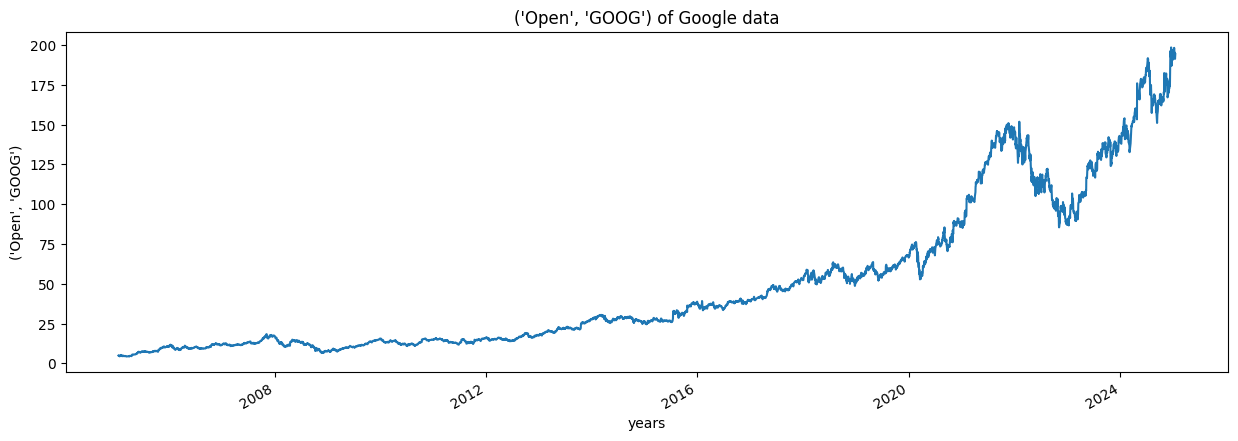

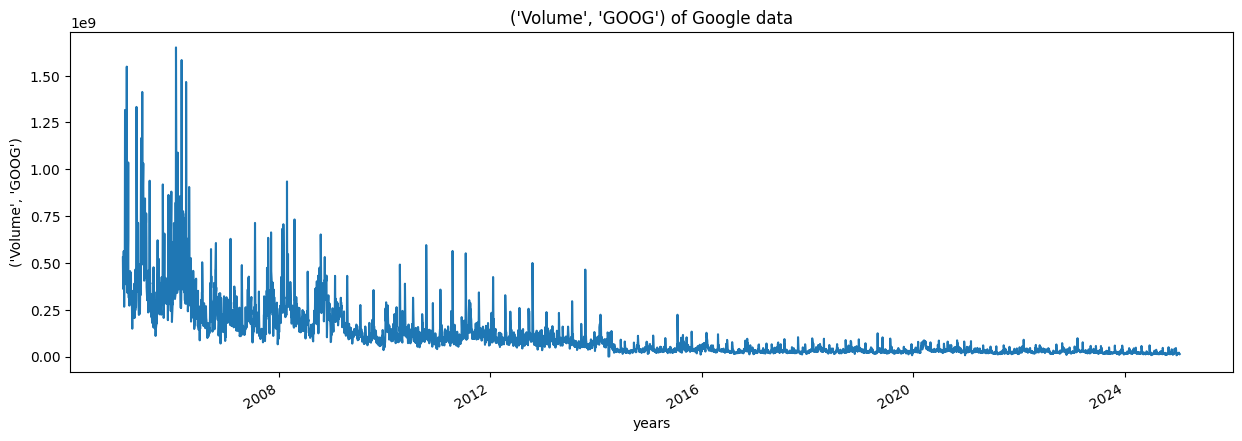

In [14]:
for column in google_data.columns :
    plot_graph((15,5),google_data[column],column)

In [15]:
import numpy as np

data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ]

# Calculate 5-day moving average
moving_average = [np.mean(data[i:i+5]) if i+5 <= len(data) else None for i in range(len(data))]

print(moving_average)

[30.0, 40.0, 50.0, 60.0, 70.0, 80.0, None, None, None, None]


In [16]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [17]:
data.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [18]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 242
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [19]:
google_data['MA_for_250_days']= google_data['Adj Close'].rolling(250).mean()

In [20]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-01-06        NaN
2006-01-09        NaN
2006-01-10        NaN
2006-01-11        NaN
2006-01-12    7.11886
Name: MA_for_250_days, dtype: float64

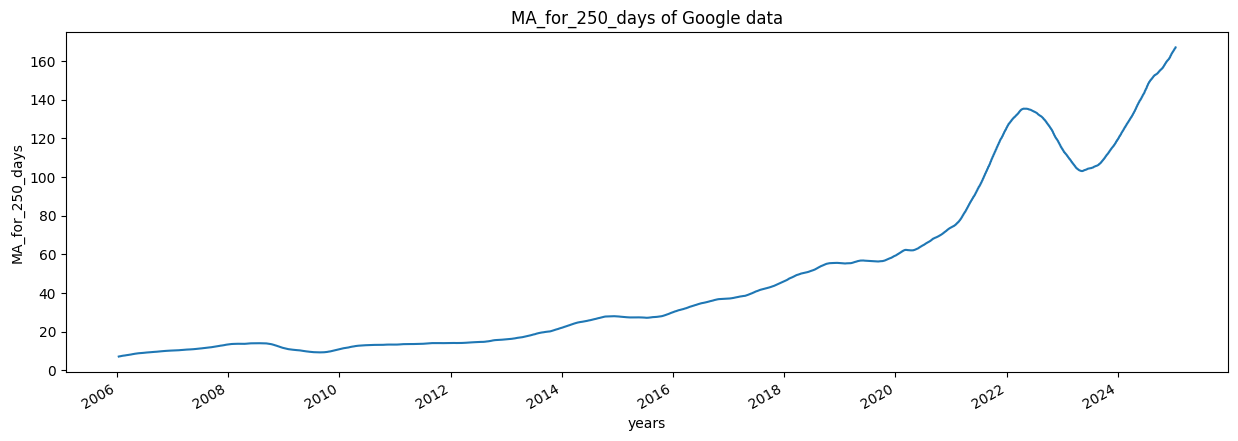

In [21]:
plot_graph((15,5),google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

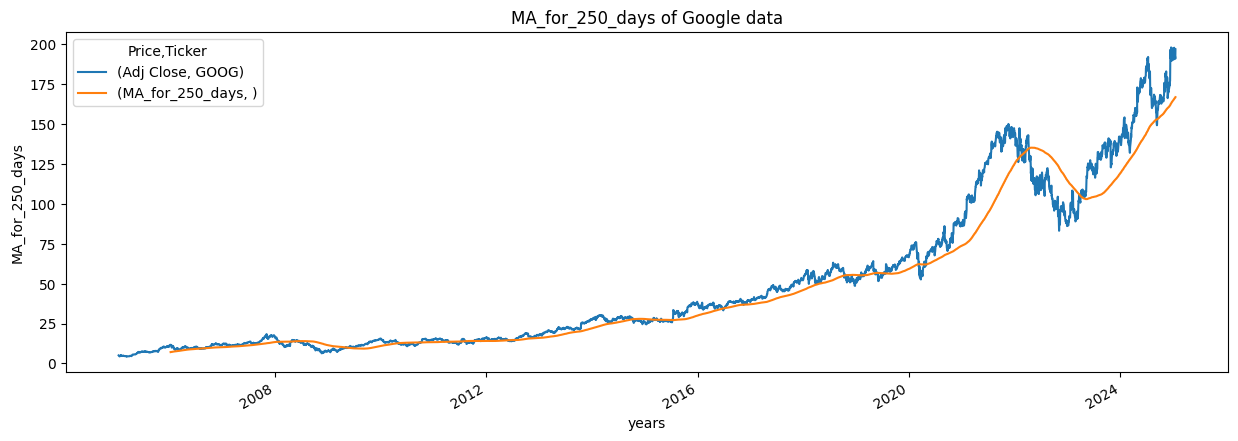

In [22]:
plot_graph((15,5),google_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

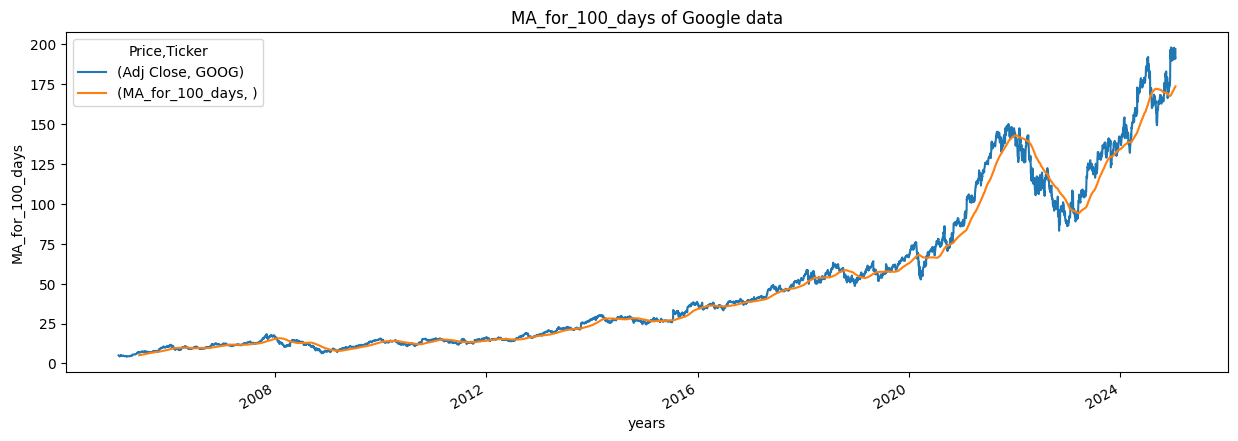

In [23]:
google_data['MA_for_100_days']= google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

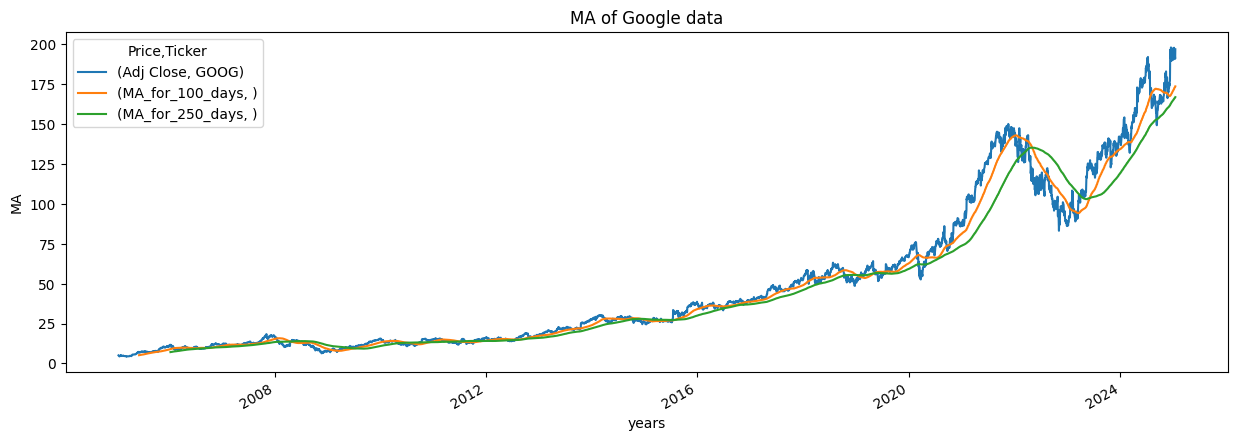

In [24]:
plot_graph((15,5),google_data[['Adj Close', 'MA_for_100_days','MA_for_250_days']], 'MA')

In [25]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-01-18,5.060283,NaN
2005-01-19,4.896488,-0.032369
2005-01-20,4.812604,-0.017131
2005-01-21,4.672634,-0.029084
2005-01-24,4.485014,-0.040153


<Figure size 640x480 with 0 Axes>

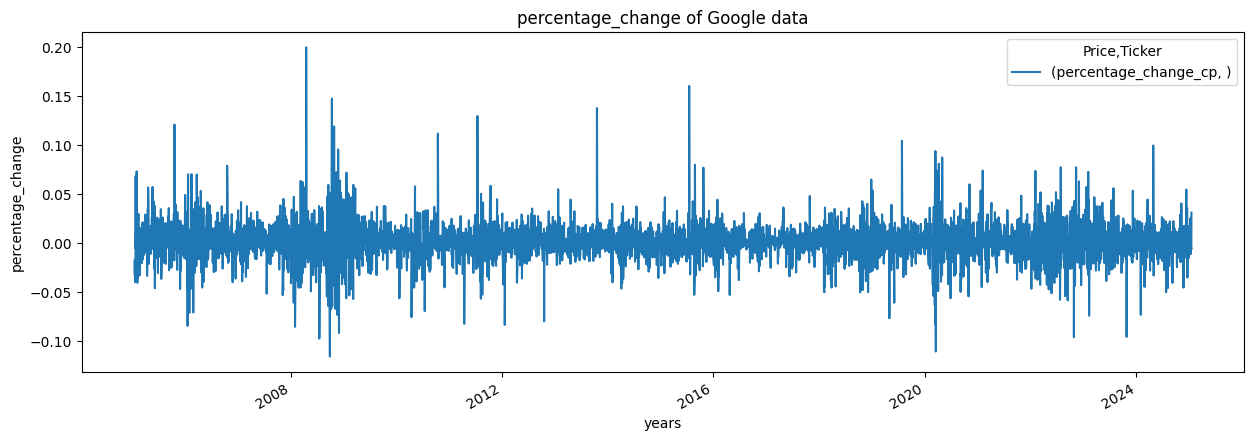

In [26]:
 plot_graph((15,5),google_data[['percentage_change_cp']], 'percentage_change')

In [27]:
Adj_close_price = google_data[['Adj Close']]

In [28]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([198.16000366]), array([4.34280968]))

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.0037018 ],
       [0.0028567 ],
       [0.0024239 ],
       ...,
       [0.96971368],
       [0.96331594],
       [0.99391175]])

In [30]:
len(scaled_data)

5032

In [31]:
x_data=[]
y_data=[]

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data),np.array(y_data)

In [32]:
x_data[0],y_data[0]

(array([[3.70180279e-03],
        [2.85670236e-03],
        [2.42390401e-03],
        [1.70172956e-03],
        [7.33705605e-04],
        [2.72737483e-04],
        [1.82465062e-03],
        [1.67611844e-03],
        [1.96550192e-03],
        [2.64158620e-03],
        [2.16525387e-03],
        [3.96557516e-03],
        [4.59300078e-03],
        [3.76070590e-03],
        [2.69408284e-03],
        [3.02828208e-03],
        [2.12428100e-03],
        [1.66331288e-03],
        [1.58904556e-03],
        [2.30482339e-03],
        [2.59164329e-03],
        [2.99883299e-03],
        [2.93353079e-03],
        [2.93992988e-03],
        [2.09738810e-03],
        [2.42774937e-03],
        [1.77983485e-03],
        [1.39313651e-03],
        [1.66459221e-03],
        [1.41746584e-03],
        [1.30478431e-03],
        [1.53911004e-03],
        [1.39697695e-03],
        [1.76958795e-03],
        [1.30734542e-03],
        [8.14369552e-04],
        [6.38946932e-04],
        [3.59807900e-04],
        [0.0

In [33]:
int(len(x_data)*0.7)

3452

In [34]:
5034-100-int(len(x_data)*0.7)

1482

In [35]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test =  x_data[splitting_len:]
y_test =  y_data[splitting_len:]

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 1)
(1480, 100, 1)
(1480, 1)


In [37]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [41]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Aditi Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 160s 45ms/step - loss: 2.3313e-04
Epoch 2/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 155s 45ms/step - loss: 7.3150e-05


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [45]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step


In [46]:
predictions

array([[0.2761316 ],
       [0.27683082],
       [0.27985728],
       ...,
       [0.90634423],
       [0.89927995],
       [0.894248  ]], dtype=float32)

In [47]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 57.861862],
       [ 57.997383],
       [ 58.58396 ],
       ...,
       [180.0079  ],
       [178.63873 ],
       [177.66345 ]], dtype=float32)

In [48]:
y_test

array([[0.26547031],
       [0.27088639],
       [0.27263692],
       ...,
       [0.96971368],
       [0.96331594],
       [0.99391175]])

In [49]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 55.79552078],
       [ 56.84524918],
       [ 57.18453217],
       ...,
       [192.28999329],
       [191.05000305],
       [196.97999573]])

In [50]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [51]:
rmse

5.226677296091058

In [52]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions':inv_predictions.reshape(-1)
 },
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-02-28,55.795521,57.861862
2019-03-01,56.845249,57.997383
2019-03-04,57.184532,58.583961
2019-03-05,57.893482,59.058731
2019-03-06,57.685730,59.579815


<Figure size 640x480 with 0 Axes>

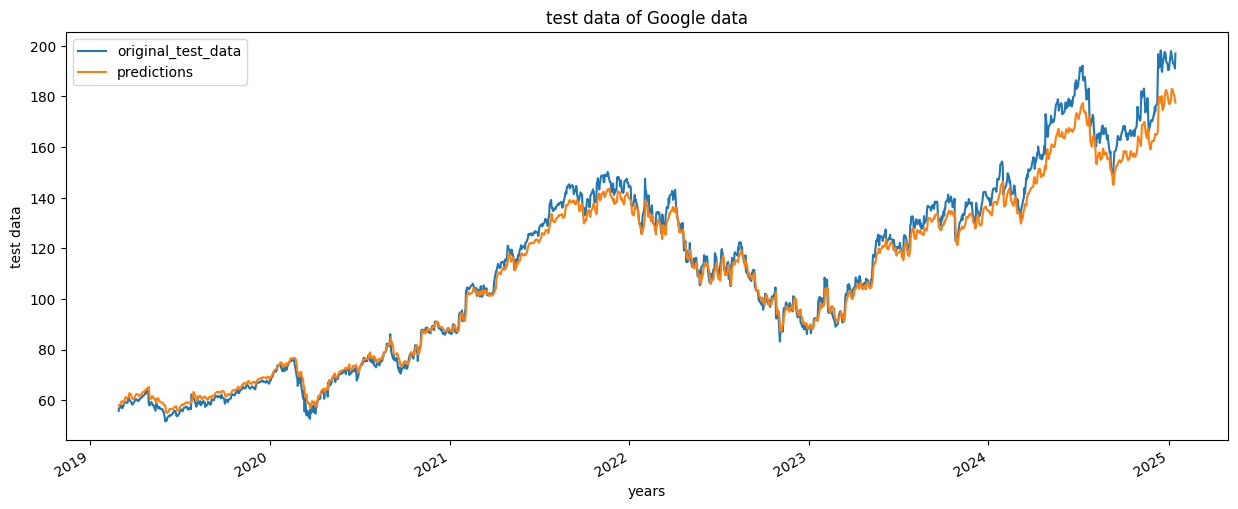

In [53]:
plot_graph((15,6),ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

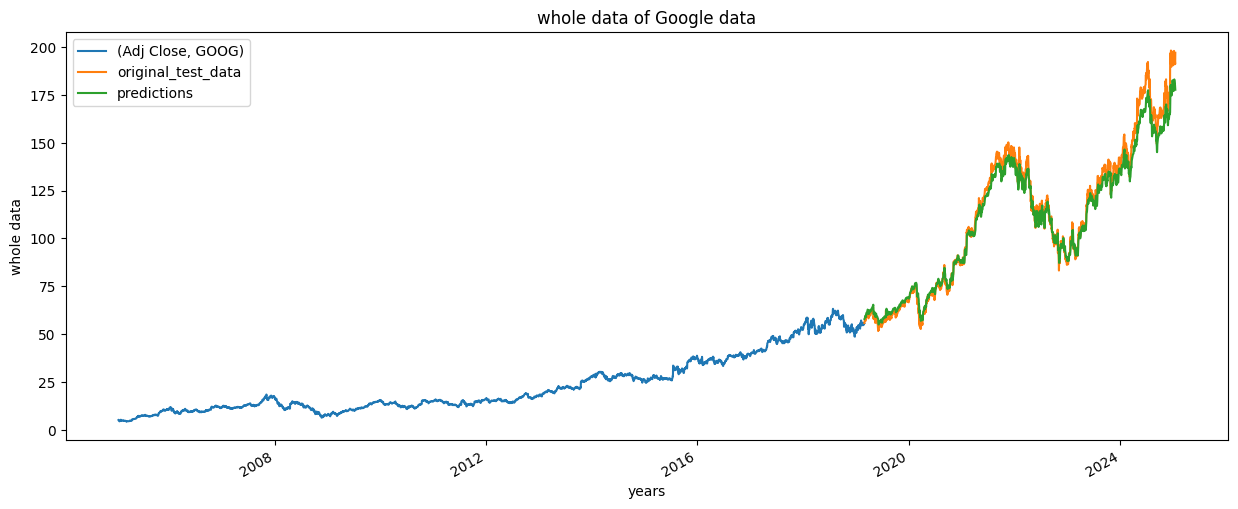

In [54]:
plot_graph((15,6),pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0) , 'whole data')

In [55]:
model.save("Latest_stock_price_model.keras")